<a href="https://colab.research.google.com/github/christian235711/covid/blob/main/code_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploratory (première partie) :

- comprendre notre base de données
- analyser la forme et le fond des données
- visualiser notre base de données à l'aide des bibliotèques python (pandas et seaborn)


### Analyse de forme:

- variable target: SARS-Cov-2 exam result
- nombre de lignes et colonnes: 5644 lignes et 111 colonnes
- types de variable avec la méthode .info() : float64 (70), int64 (4), object (37)
- types de variable après analyse : 70 quantitatives et 41 qualitatives
- valeurs manquantes: à peu près 80% de la base de données. Il y a 5 variables qui ne contient aucune valeur et  quasi la totalité des variables ont plus de 86% de valeurs manquantes.

### Analyse de fond :

- variable target: 
  - negative: 5086 (~ 90.1%)
  - positive: 558 (~ 9.9%)

- on supprime les variables inutiles qui ont plus de 90% de valeurs manquantes
- variable *Patient ID* : aucune valeur ne se repète, donc on élimine cette variable
- les variables quantitatives de type objet sont : 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63','Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3','Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4','Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009','Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2','Influenza B, rapid test', 'Influenza A, rapid test'.
 
Remarque: Vous trouverez ci-dessous les lignes de code que j'ai utilisé pour faire mon analyse. Plus tard, vous trouverez la deuxième partie de mon travail.

In [5]:
data = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/covid/dataset_covid.xlsx")
print(data.shape)

(5644, 111)


In [6]:
# Visualisation des données et choix de la variable target
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Type de variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [8]:
# Recherche des variables qualitatives et quantitatives
print(data.dtypes [data.dtypes == float].head()); print('\n')
print(data.dtypes [data.dtypes == int].head()); print('\n')
print(data.dtypes [data.dtypes == object].head())

Hematocrit               float64
Hemoglobin               float64
Platelets                float64
Mean platelet volume     float64
Red blood Cells          float64
dtype: object


Patient age quantile                                     int64
Patient addmited to regular ward (1=yes, 0=no)           int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    int64
Patient addmited to intensive care unit (1=yes, 0=no)    int64
dtype: object


Patient ID                     object
SARS-Cov-2 exam result         object
Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
dtype: object


In [9]:
# Variables
all_features = data.columns
print(all_features)

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)


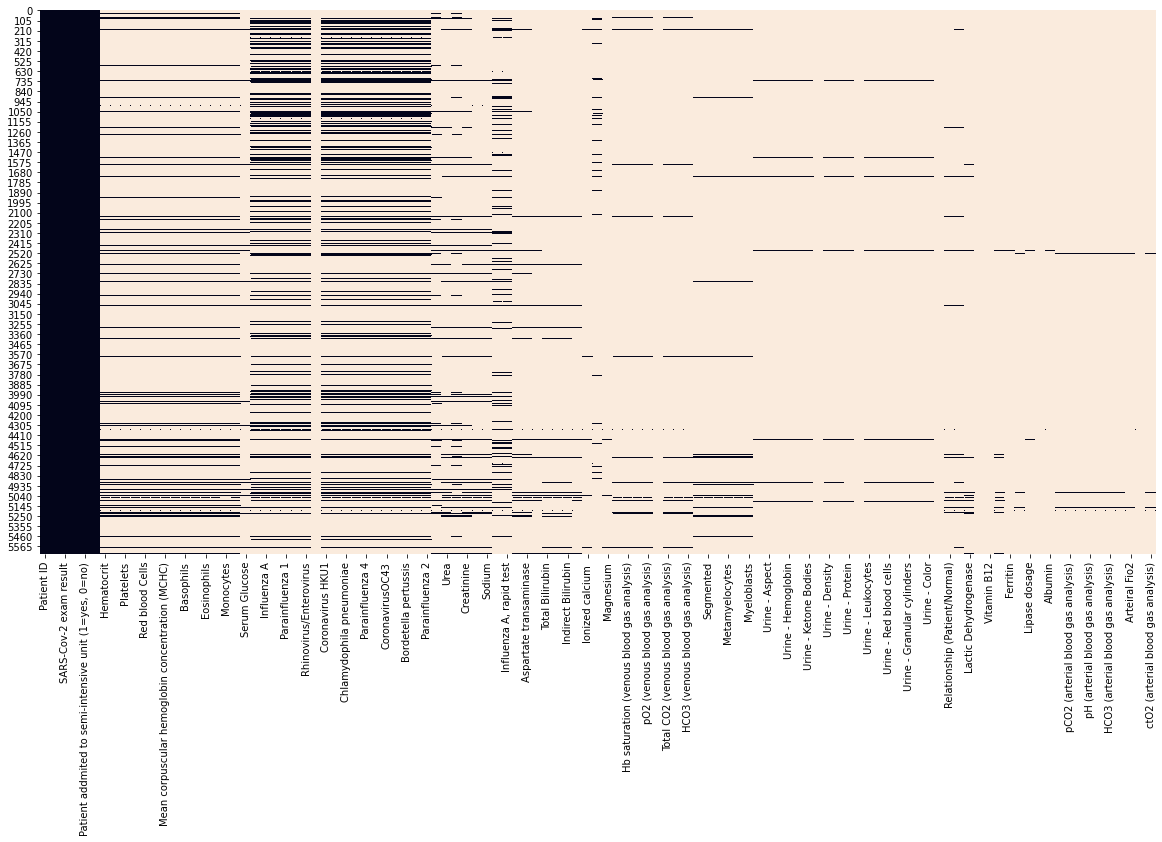

In [10]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(20,10) )
sns.heatmap(data.isnull(), cbar =False)

In [11]:
# Nombre total de valeurs manquantes
print(data.isnull().sum())
print("\nNombre total de valeurs manquantes : ",data.isnull().sum().sum())
print("\nPourcentage " + str(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100)+"%" )

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

Nombre total de valeurs manquantes :  551682

Pourcentage 88.06003026414082%


In [12]:
# Pourcentage des valeurs manquantes par variable
pd.set_option("display.max_row",111)
(data.isna().sum()/data.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [13]:
# Eliminer les colonnes inutiles
data=data.loc[:, data.isna().sum()/data.shape[0] <.9 ] # ou data[  data.columns[data.isna().sum()/data.shape[0] < .9]  ]
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


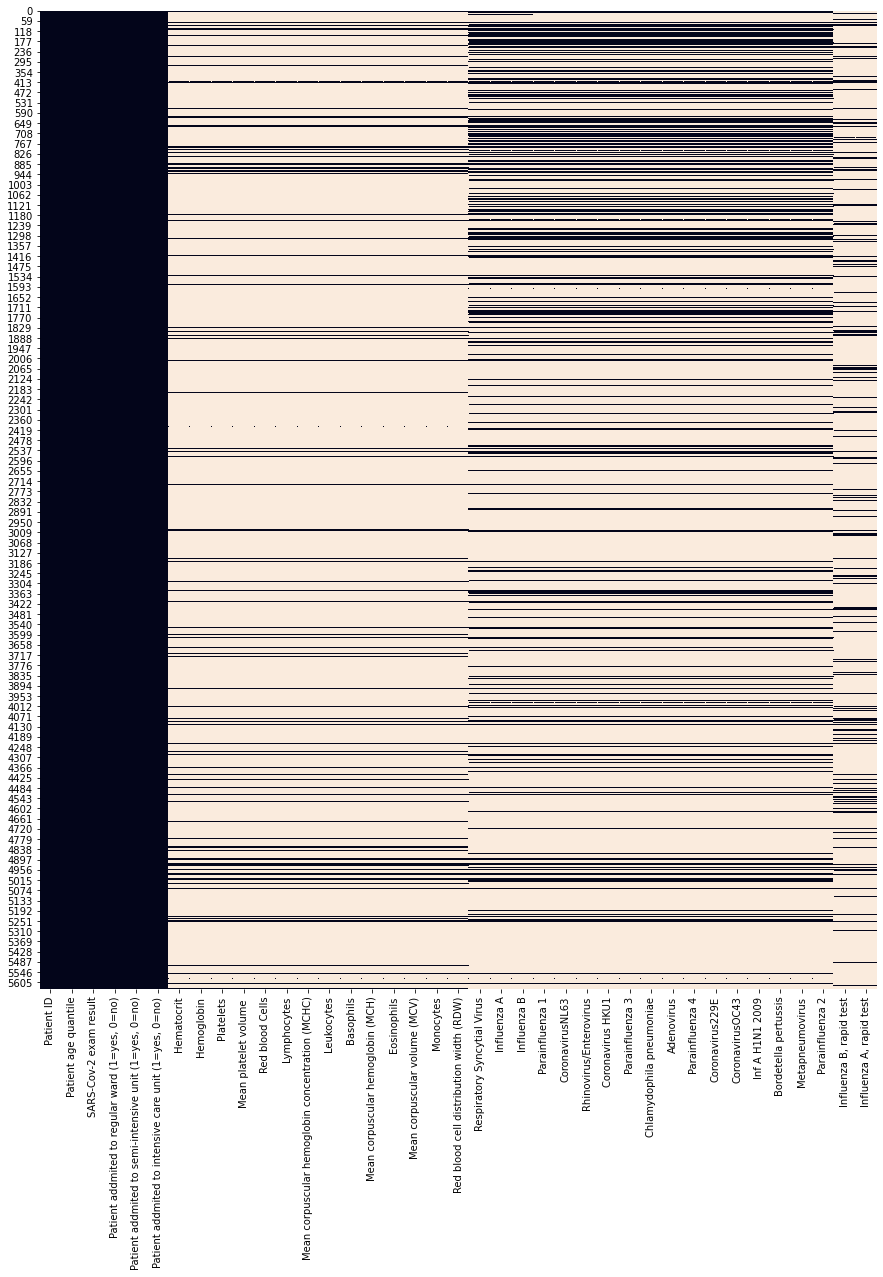

In [14]:
# Visualiser la nouvelle base de données
plt.figure(figsize=(15,18) )
sns.heatmap(data.isnull(), cbar=False)

In [15]:
#On voit que chacun de ces patients a un identifiant.   
print( (data['Patient ID'].value_counts() == 1).sum() == data.shape[0] )
# On constate que chacun de ces identifiants ne se repète pas. Donc, on peut effacer cette variable.
data = data.drop('Patient ID', axis=1)
data.head()

True


,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [16]:
# Analyser la variable target
print(data['SARS-Cov-2 exam result'].value_counts())
data['SARS-Cov-2 exam result'].value_counts()/data.shape[0]*100

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64

# Data Exploratory (seconde partie) 
- analyser la nouvelle base de données

## Analyse de forme:

- nombre de lignes et colonnes: 5644 lignes et 38 colonnes
- types de variable après analyse : 14 quantitatives et 24 qualitatives

## Analyse de fond :

### Analyse univariée

- Variables quantitatives :
  - Elles sont centrées en zéro sauf *Basophils* et *Eosinophils* qui sont asymétriques. Ceci nous penser à une transformation des données mais nous ne connaitrons la réponse par manque d'information sur ces données. 


- Variables qualitatives :
  - elles sont divisées en deux types (objet et int)

  - les variables de type int sont :'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'. La proportion des classes de chaque variable est inégale.

  - variable target: il n'y a pas de valeur manquante. Elle se divise en deux groupe : 
    - negative: 5086 (~ 90.1%)
    - positive: 558 (~ 9.9%)

  - variable *Patient age quantile* : les valeurs sont entre 0 et 19 mais on ne sait pas s'il s'agit des années. Peut-être il y a eu une transformation des données. Pour la suite de notre étude, cette variable ne sera prise en compte.

  - la disproportion extrême de groupes est présente dans toutes les variables sauf en *Parainfluenza 2*  qui ne continent qu'un seul type de valeur *non_detected* (cette dernière sera éliminée plus tard). Si nous nous centrons , par exemple, sur la variable *Influenza B* qui se divise en deux classes detected et non detected avec une proportion de 5 et 94% respectivement (clairement l'écart est énorme). Ce phénomène est également caracterisées dans les autres variables. Dans ce sens, afin de faire une analyse sur ce genre de données, ça va être dificile, il va falloir peut-être éliminer certaines variables.

  - la variable *Rhinovirus/Enterovirus* contient 28 % de valeurs libéllées detected et 72% de valeurs non detected. Donc, on puorra garder cette variable car l'écart n'est pas aussi grand que pour *Influenza B* par exemple.

- Analyse bivariée
  - la variable cible en fonction des variables quantitative sang:
    - la distribution de chacune des classes de *Hematocrit*, *Hemoglobin*, *Red blood cell*(2), *Mean corpuscular volume* (2), *Mean corpuscular hemoglobin*, *Lymphocytes* sont similaires. Par contre, les variables *Monocytes*, *Eosinophils*, *Basophils*, *Leukocytes*, *Mean platelet volume*, *Platelets* ont des distributions différentes.
  - Variable cible et variables qualitatives:



In [17]:
# Analyse de la nouvelle base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   5644 non-null   int64  
 1   SARS-Cov-2 exam result                                 5644 non-null   object 
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 5   Hematocrit                                             603 non-null    float64
 6   Hemoglobin                                             603 non-null    float64
 7   Platelets                                              602 non-null    float64
 8   Mean platelet volume                            

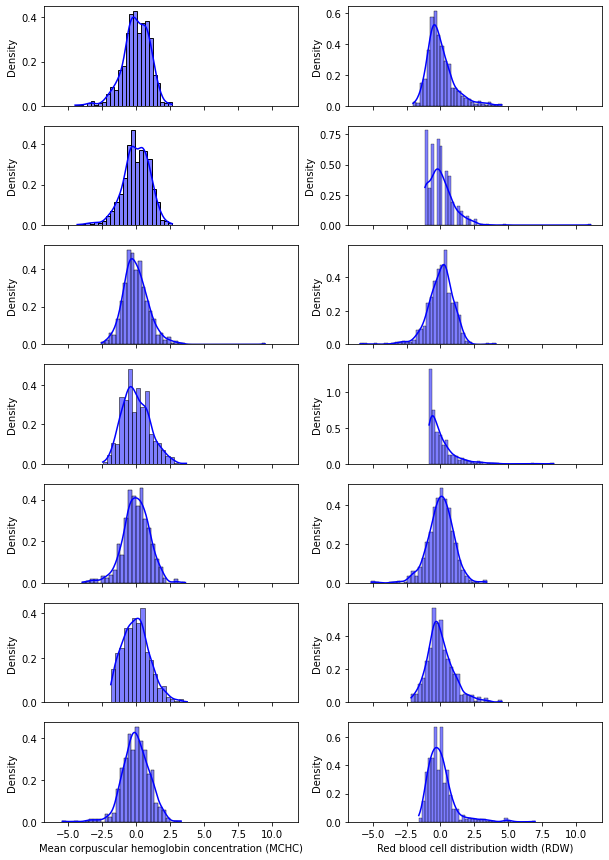

In [18]:
# Histogrames de toutes les variables quantitatives
f, axes = plt.subplots(7, 2, figsize=(10, 15), sharex=True)
a= 0
for i in data.columns[data.dtypes== float]:
  if a <= 6:
    sns.histplot(data.loc[:,i], stat="density", kde=True, color="b", ax=axes[a,0]) #.set_title(str(i))
  else:
   sns.histplot(data.loc[:,i], stat="density", kde=True, color="b", ax=axes[a-7,1]) #.set_title(str(i))
  a= a+1
# on ne distingue pas bien les images. Il va falloir les afficher un par un.

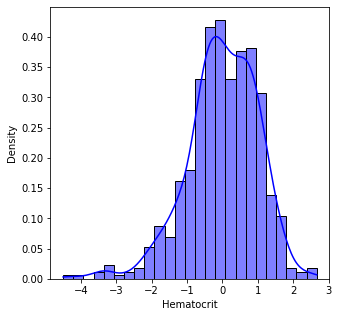

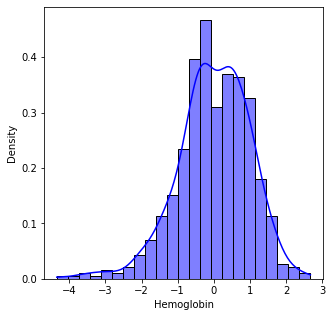

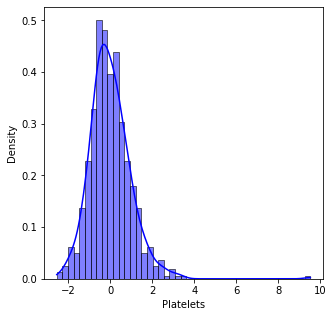

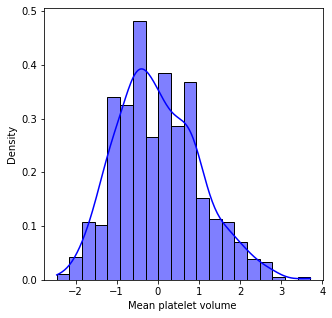

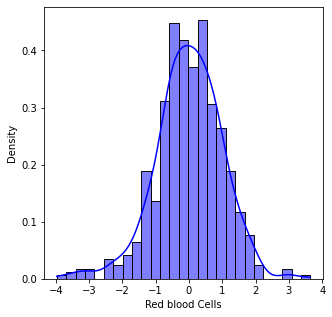

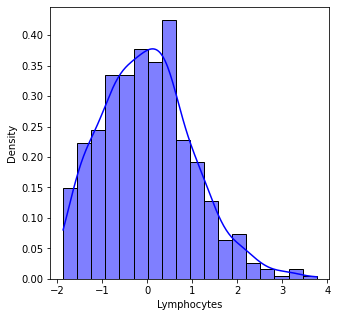

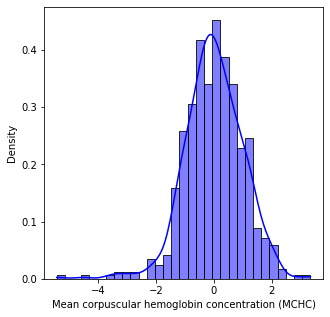

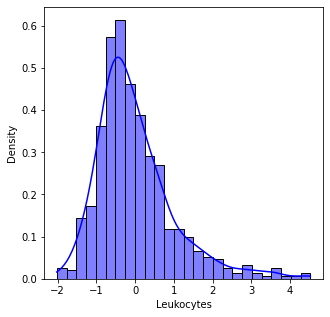

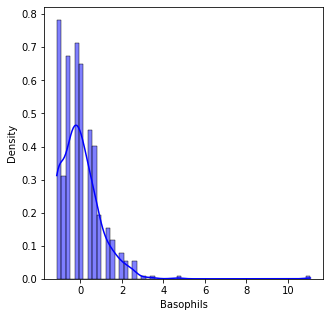

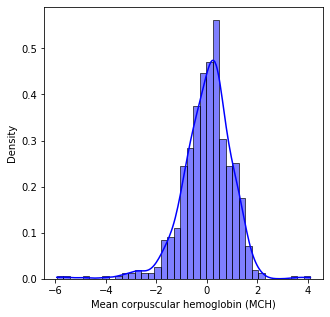

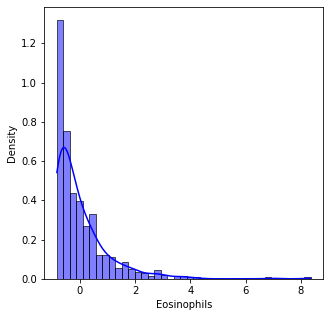

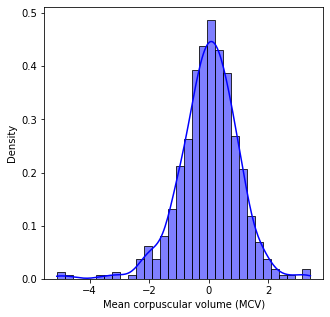

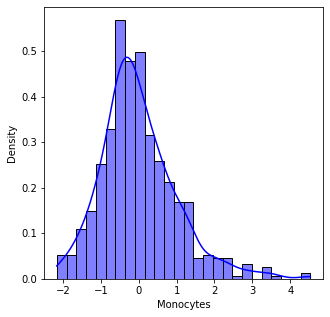

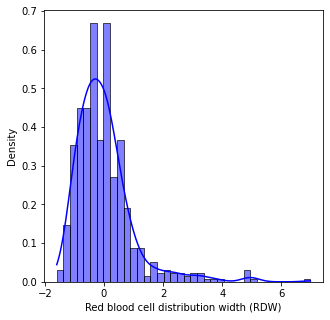

In [19]:
# Histogrames de toutes les variables quantitatives (meilleure visualisation)
for i in data.columns[data.dtypes== float]:
    plt.figure(figsize=(5,5) )
    sns.histplot(data.loc[:,i], stat="density", kde=True, color="b") #.set_title(str(i))

count    5644.000000
mean        9.318391
std         5.777903
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: Patient age quantile, dtype: float64

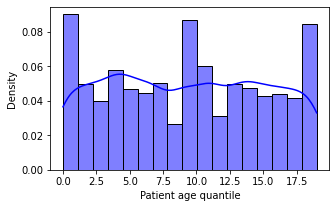

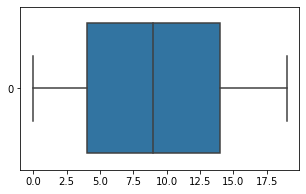

In [20]:
# Variable qualitative "Patient age quantile"
plt.figure(figsize=(5,3))
sns.histplot(data['Patient age quantile'], stat="density", kde=True, color="b")

plt.figure(figsize=(5,3))
sns.boxplot(data =data['Patient age quantile'], orient= "h")

data['Patient age quantile'].describe()


negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64


NaN             76.009922
not_detected    23.068746
detected         0.921332
Name: Respiratory Syncytial Virus, dtype: float64


NaN             76.009922
not_detected    23.671155
detected         0.318923
Name: Influenza A, dtype: float64


NaN             76.009922
not_detected    22.625797
detected         1.364281
Name: Influenza B, dtype: float64


NaN             76.045358
not_detected    23.901488
detected         0.053154
Name: Parainfluenza 1, dtype: float64


NaN             76.045358
not_detected    23.157335
detected         0.797307
Name: CoronavirusNL63, dtype: float64


NaN             76.045358
not_detected    17.239546
detected         6.715096
Name: Rhinovirus/Enterovirus, dtype: float64


NaN             76.045358
not_detected    23.600283
detected         0.354359
Name: Coronavirus HKU1, dtype: float64


NaN             76.045358
not_detected    23.777463
detected         0.

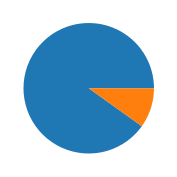

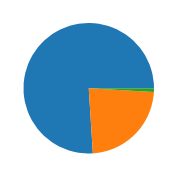

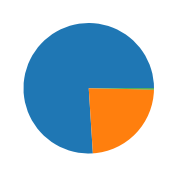

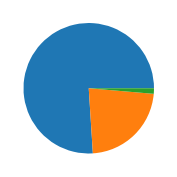

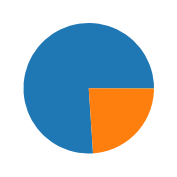

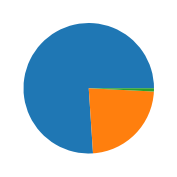

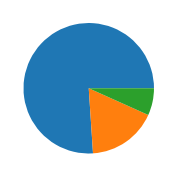

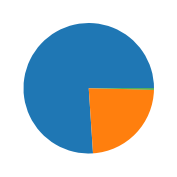

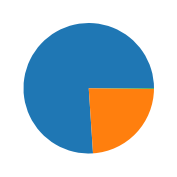

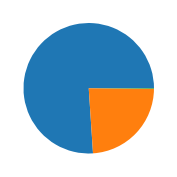

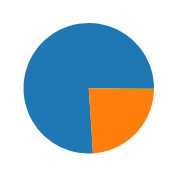

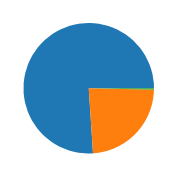

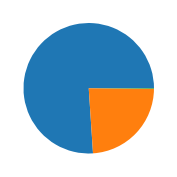

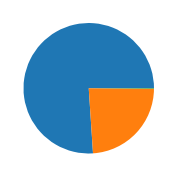

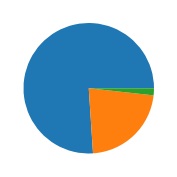

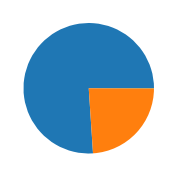

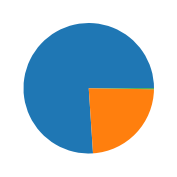

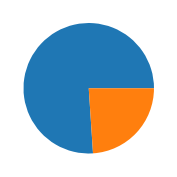

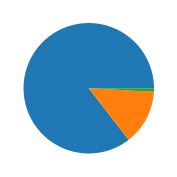

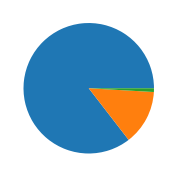

In [21]:
# Diagramme circulaire des variables qualitatives (de type objet)
# Partie A : on prend en compte les valeurs manquantes

for i in data.columns[data.dtypes== object]:
  print(data.loc[:,i].value_counts(dropna = False, normalize=True)*100 ); print("\n")
  plt.figure(figsize=(5,3))
  plt.pie(data.loc[:,i].value_counts(dropna = False, normalize=True) )



negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64


not_detected    96.159527
detected         3.840473
Name: Respiratory Syncytial Virus, dtype: float64


not_detected    98.670606
detected         1.329394
Name: Influenza A, dtype: float64


not_detected    94.313146
detected         5.686854
Name: Influenza B, dtype: float64


not_detected    99.778107
detected         0.221893
Name: Parainfluenza 1, dtype: float64


not_detected    96.671598
detected         3.328402
Name: CoronavirusNL63, dtype: float64


not_detected    71.967456
detected        28.032544
Name: Rhinovirus/Enterovirus, dtype: float64


not_detected    98.52071
detected         1.47929
Name: Coronavirus HKU1, dtype: float64


not_detected    99.260355
detected         0.739645
Name: Parainfluenza 3, dtype: float64


not_detected    99.33432
detected         0.66568
Name: Chlamydophila pneumoniae, dtype: float64


not_detected    99.038462
detected         0.961538
Name: Adenov

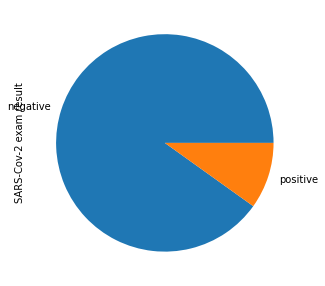

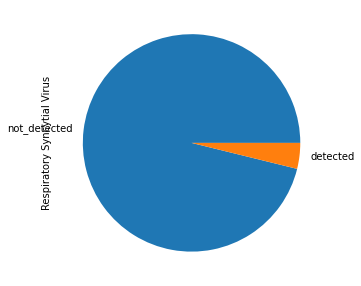

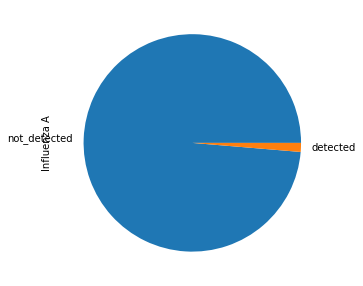

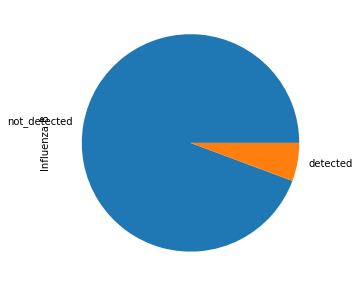

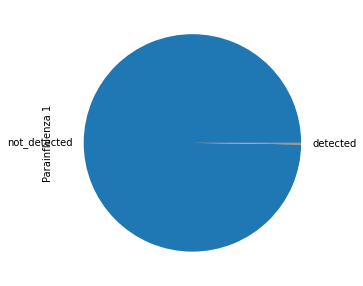

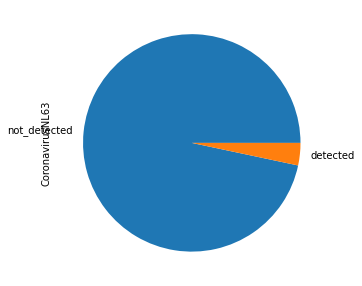

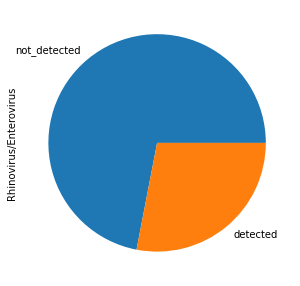

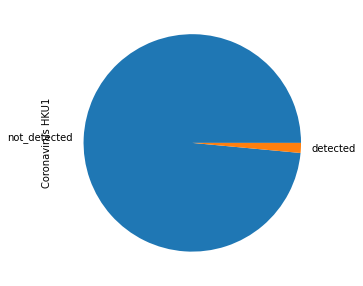

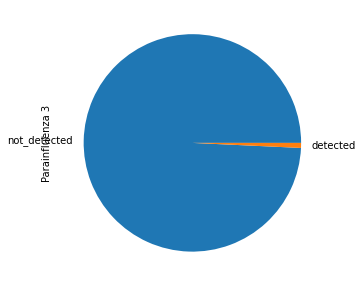

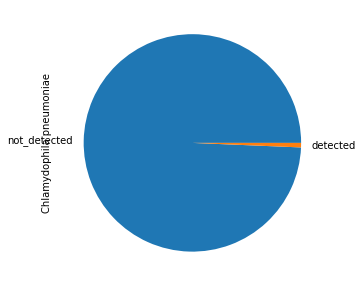

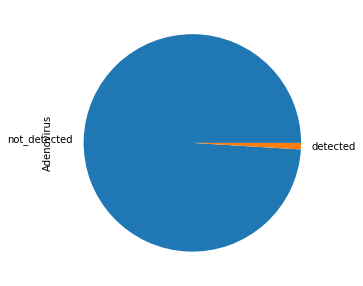

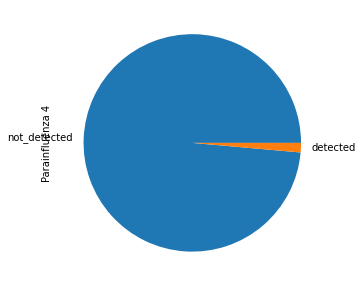

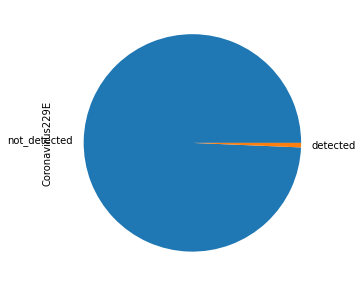

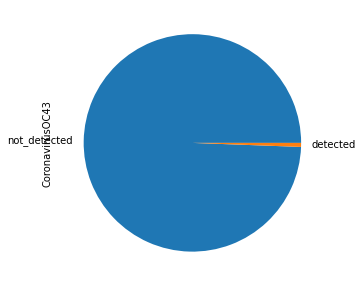

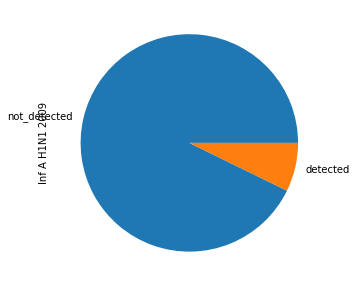

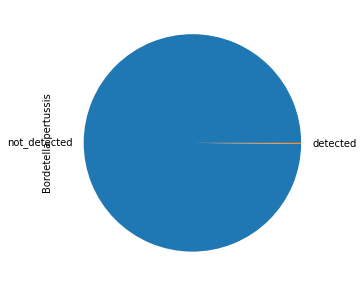

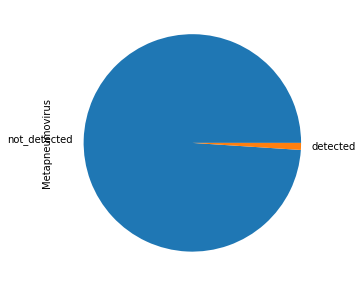

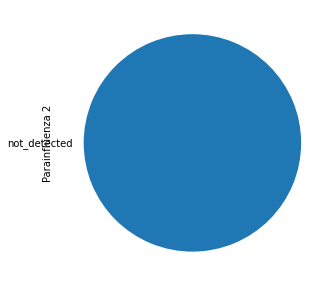

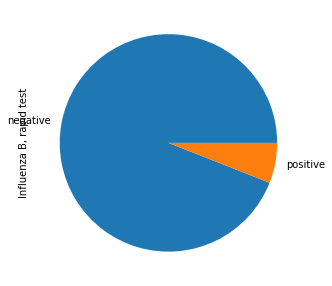

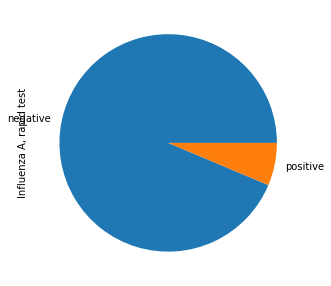

In [22]:
# Diagramme circulaire des variables qualitatives (de type objet)
# Partie B : on ne prend pas en compte les valeurs manquantes
for i in data.columns[data.dtypes== object]:
  #print(data.loc[:,i].value_counts(normalize=True)*100 ); print("\n")
  #print(data.loc[:,i].value_counts(dropna =False) ); print("\n")
  #print(data.loc[:,i].value_counts(dropna = False, normalize=True)*100 ); print("\n")
  print(data.loc[:,i].value_counts( normalize=True)*100 ); print("\n")
  plt.figure(figsize=(5,5))
  data.loc[:,i].value_counts().plot.pie(subplots=True)



0    98.600283
1     1.399717
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: float64


0    99.114103
1     0.885897
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: float64


0    99.273565
1     0.726435
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: float64




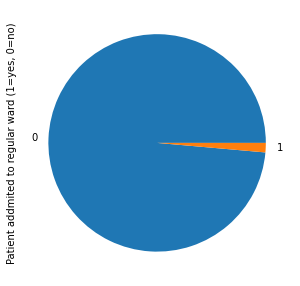

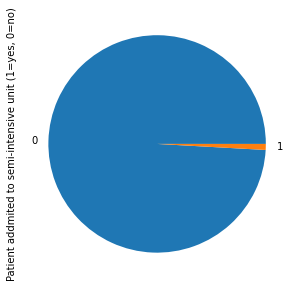

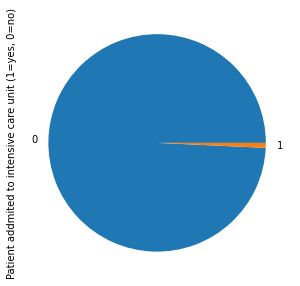

In [23]:
# Diagramme circulaire des variables qualitatives (de type int)

for i in data.columns[data.dtypes== int][1:]:
  #print(data.loc[:,i].value_counts(normalize=True)*100 ); print("\n")
  #print(data.loc[:,i].value_counts(dropna =False) ); print("\n")
  #print(data.loc[:,i].value_counts(dropna = False, normalize=True)*100 ); print("\n")
  print(data.loc[:,i].value_counts( normalize=True)*100 ); print("\n")
  plt.figure(figsize=(5,5))
  data.loc[:,i].value_counts().plot.pie(subplots=True)


In [24]:
# Afficher le pourcentage des valeurs manquantes de chaque variable
(data.isna().sum()/data.shape[0]).sort_values()*100

Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
Patient addmited to intensive care unit (1=yes, 0=no)     0.000000
Respiratory Syncytial Virus                              76.009922
Influenza A                                              76.009922
Influenza B                                              76.009922
Inf A H1N1 2009                                          76.045358
CoronavirusOC43                                          76.045358
Metapneumovirus                                          76.045358
Parainfluenza 4                                          76.045358
Adenovirus                                               76.045358
Chlamydophila pneumoniae                                 76.045358
Parainfluenza 3                                          76.04

In [25]:
# Effacer la variable Parainfluenza 2 
data = data[data.columns[data.columns != 'Parainfluenza 2']]

# Diviser les variables en deux groupes (les maladies et les indicateurs d'analyse de sang)
val = (data.isna().sum()/data.shape[0])*100
maladie_col = data.columns[(val > 76) & (val < 86)]
sang_col = data.columns[val > 86]
print("maladies : "+str(maladie_col))
print("sang : "+ str(sang_col))


maladies : Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')
sang : Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')


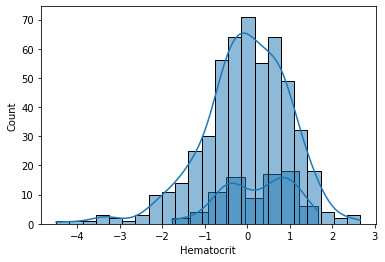

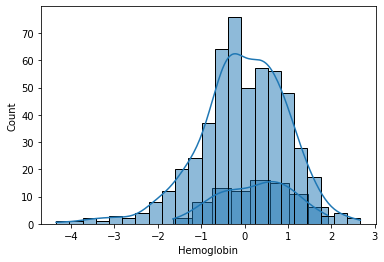

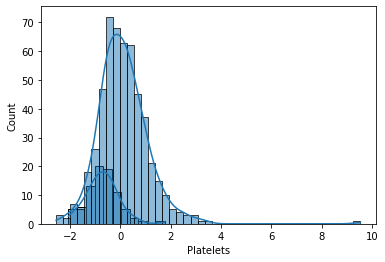

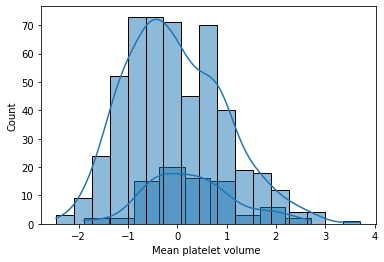

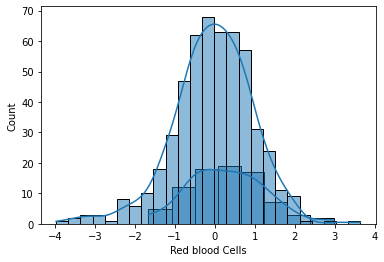

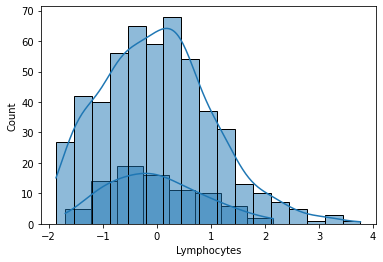

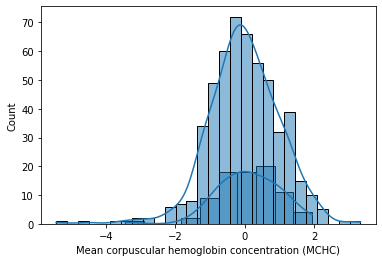

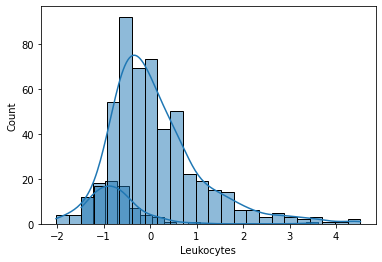

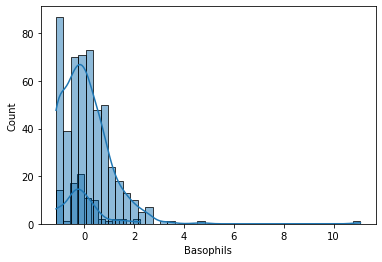

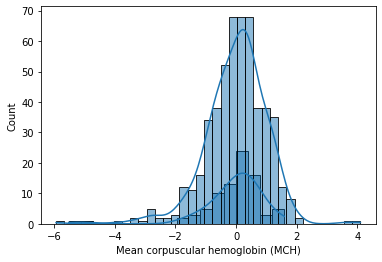

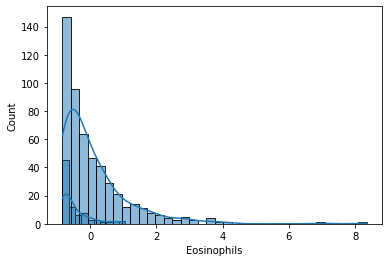

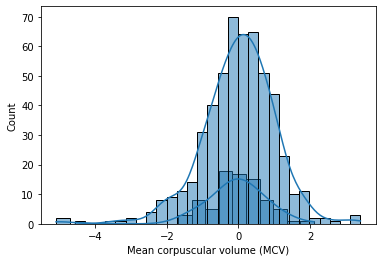

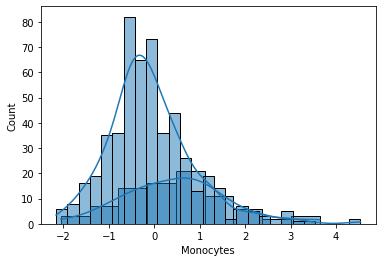

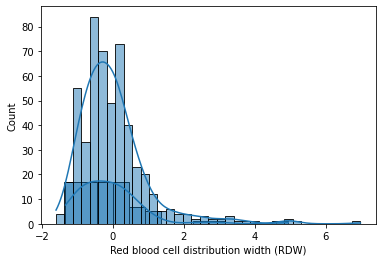

In [26]:
# 
for i in sang_col:
  plt.figure()
  sns.histplot(data.loc[data["SARS-Cov-2 exam result"]=="positive", i ],kde= True )
  sns.histplot(data.loc[data["SARS-Cov-2 exam result"]=="negative", i ], kde =True  )


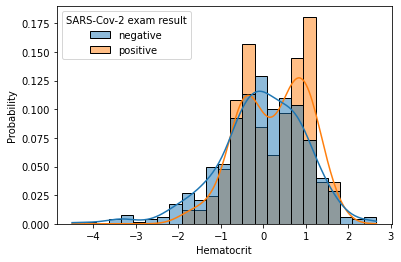

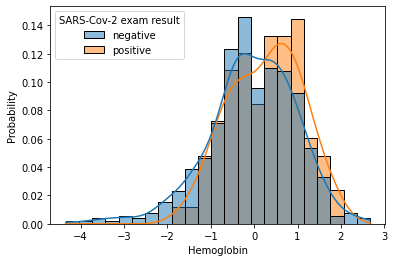

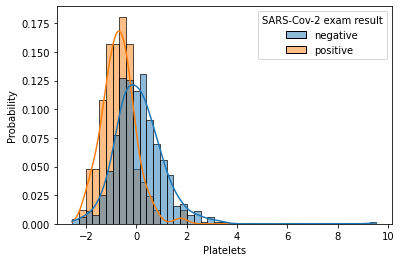

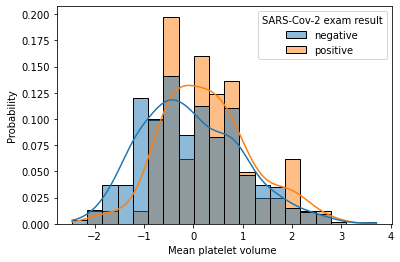

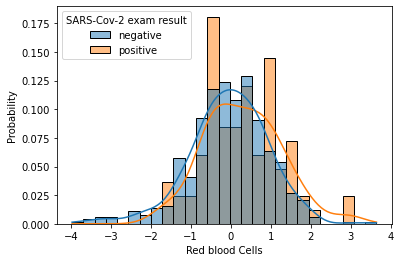

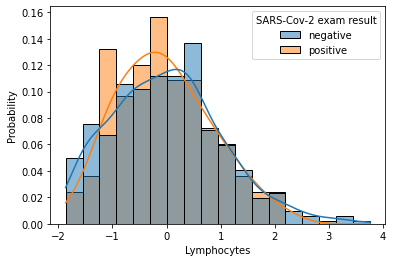

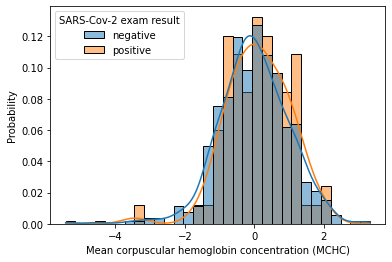

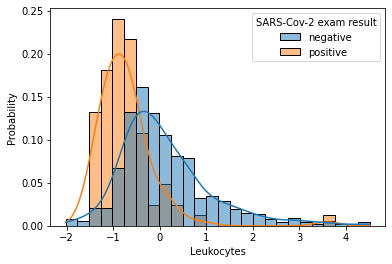

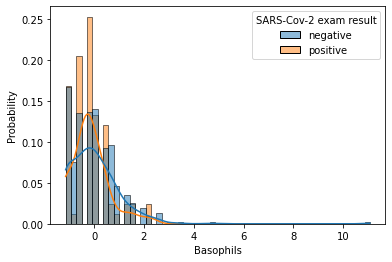

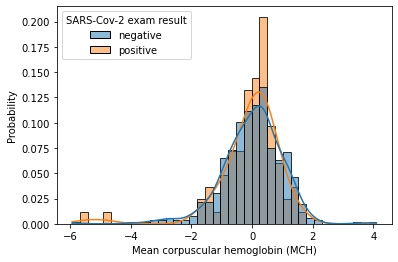

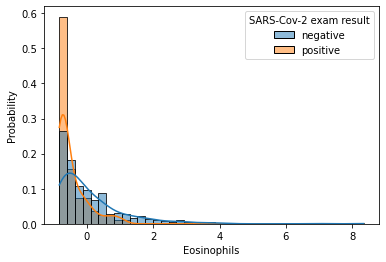

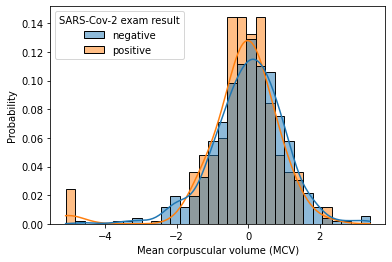

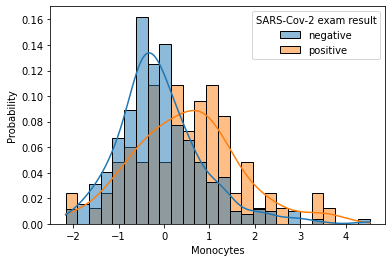

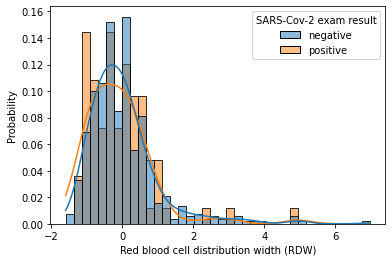

In [27]:
# Analyse bivariée (variable cible et variables sang_col)
for i in sang_col:
  plt.figure() 
  sns.histplot(data = data,x= i , hue= "SARS-Cov-2 exam result",stat='probability', kde=True, common_norm=False  ) 

In [35]:
# Variable cible et variables qualitatives
for i in maladie_col: 
  print( pd.crosstab( data["SARS-Cov-2 exam result"], data[str(i)], margins=True, normalize=True )*100 ); print("\n")

Respiratory Syncytial Virus  detected  not_detected         All
SARS-Cov-2 exam result                                         
negative                     3.840473     87.887740   91.728213
positive                     0.000000      8.271787    8.271787
All                          3.840473     96.159527  100.000000


Influenza A             detected  not_detected         All
SARS-Cov-2 exam result                                    
negative                1.329394     90.398818   91.728213
positive                0.000000      8.271787    8.271787
All                     1.329394     98.670606  100.000000


Influenza B             detected  not_detected         All
SARS-Cov-2 exam result                                    
negative                5.465288     86.262925   91.728213
positive                0.221566      8.050222    8.271787
All                     5.686854     94.313146  100.000000


Parainfluenza 1         detected  not_detected         All
SARS-Cov-2 exam result   

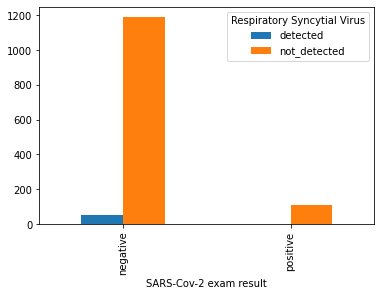

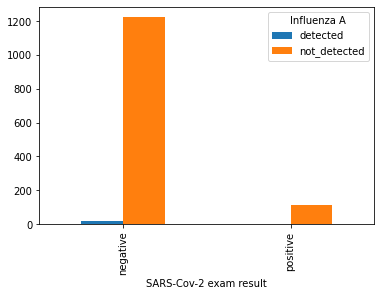

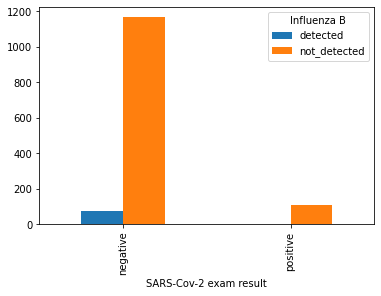

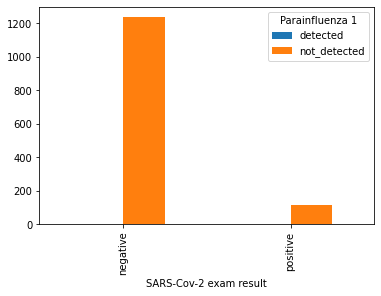

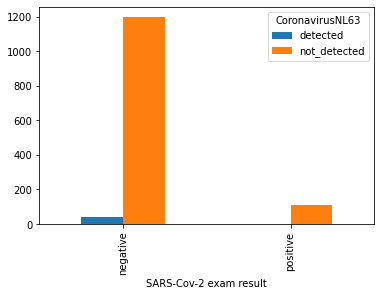

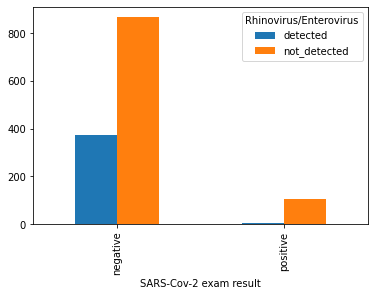

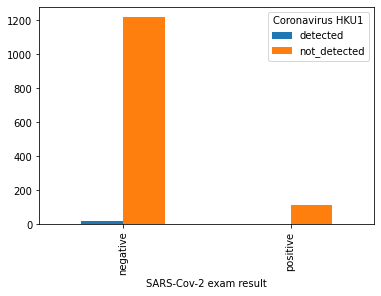

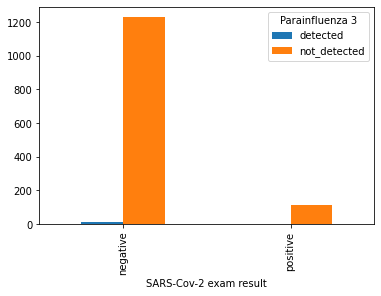

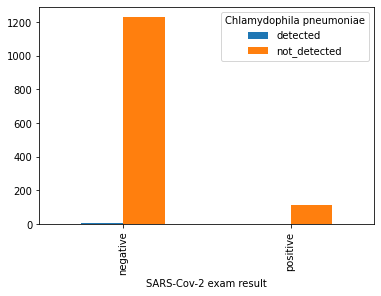

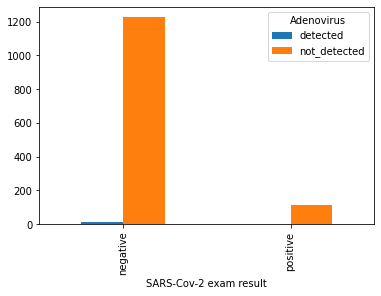

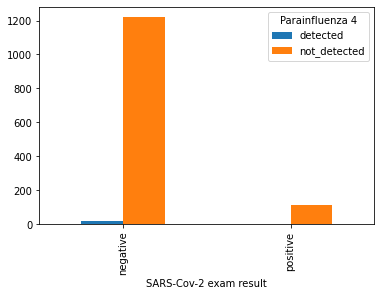

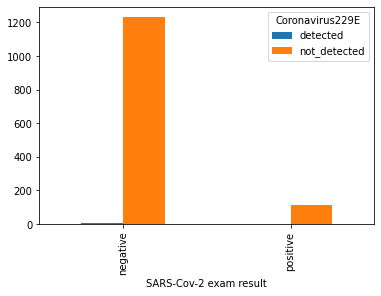

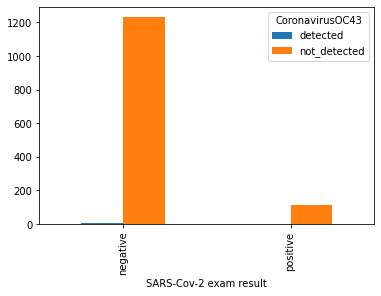

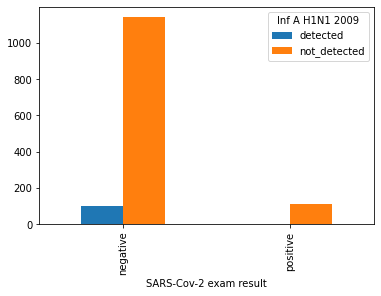

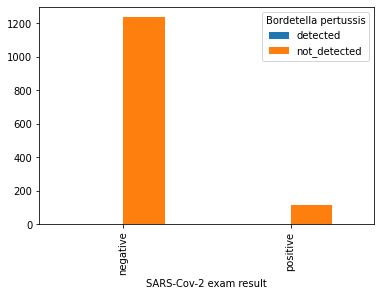

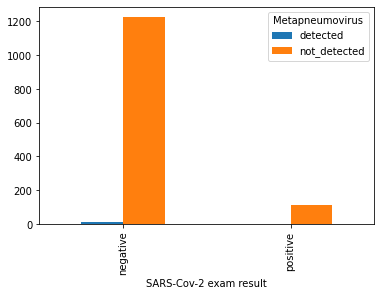

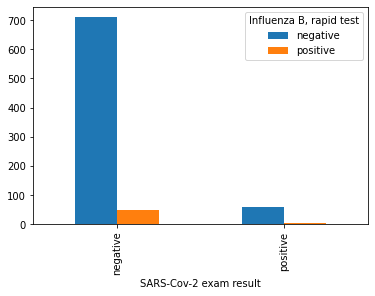

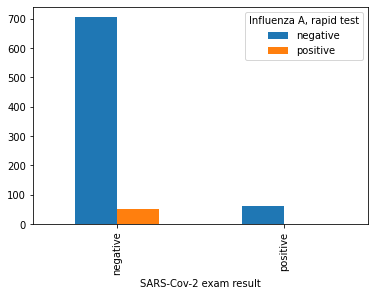

In [ ]:

for i in maladie_col:
  #plt.figure() 
  pd.crosstab( data["SARS-Cov-2 exam result"], data[str(i)] ).plot.bar()




In [ ]:
# chercher les variables qui n'ont que des valeurs manquantes
colonnes_nan = data.isnull().sum() == data.shape[0]
print(all_features[colonnes_nan==True])
print(data.shape)
# supprimer ces variables
data = data.loc[:,colonnes_nan==False]
print(data.shape)
features = data.columns

Index(['Mycoplasma pneumoniae', 'Urine - Sugar',
       'Partial thromboplastin time (PTT) ', 'Prothrombin time (PT), Activity',
       'D-Dimer'],
      dtype='object')
(5644, 111)
(5644, 106)


0
0
0


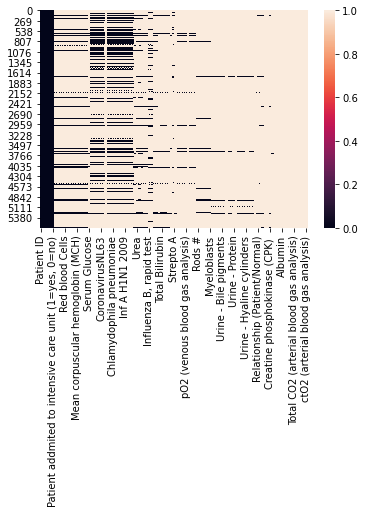

In [ ]:
# chercher les lignes qui ont que des valeurs manquantes
print( (data.T.isnull().sum() == data.shape[1] ).sum() )
# il n'y en a pas

# si on enlèle la première variable
print( (data.iloc[:,1::].T.isnull().sum() == (data.shape[1]-1  ) ).sum() )
# il n'y en a pas

# si on enlèle les premières variables
print( (data.iloc[:,2::].T.isnull().sum() == (data.shape[1]-2  ) ).sum() )
# iln'y en a pas
# pas besoin de supprimer des lignes pour l'instant

# visualitation des valeurs manquantes
sns.heatmap(data.isnull())


In [ ]:
# On garde les variables qui ont moins de 80% de valeurs manquantes. Il faut définir un seuil
# manquantes > seuil. Si on avait choisit 10,20,...,70% on aurait obtenu 6 variables qui un 
# nombre petit pour faire ensuite une analyse. 
x = data.isnull().sum() > data.shape[0]*0.80 
print(x[x==True])
print(data.shape)

# on supprime ses valeurs
a_features=features[x==False]
print(a_features.shape)
print(a_features)
data = data.loc[::,a_features]
data.head(5)


Hematocrit                            True
Hemoglobin                            True
Platelets                             True
Mean platelet volume                  True
Red blood Cells                       True
                                      ... 
HCO3 (arterial blood gas analysis)    True
pO2 (arterial blood gas analysis)     True
Arteiral Fio2                         True
Phosphor                              True
ctO2 (arterial blood gas analysis)    True
Length: 83, dtype: bool
(5644, 106)
(23,)
Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovir

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [ ]:
# nombre de valeurs manquantes de variables 
data.loc[:,a_features].isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Respiratory Syncytial Virus                              4290
Influenza A                                              4290
Influenza B                                              4290
Parainfluenza 1                                          4292
CoronavirusNL63                                          4292
Rhinovirus/Enterovirus                                   4292
Coronavirus HKU1                                         4292
Parainfluenza 3                                          4292
Chlamydophila pneumoniae                                 4292
Adenovirus                                               4292
Parainfl

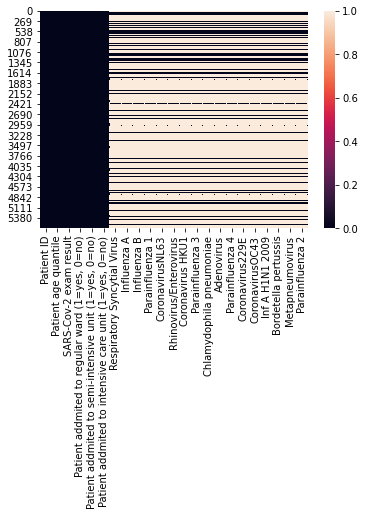

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
# chercher les lignes qui ont toutes ses valeurs manquantes
data.dropna(how='all').shape
# il n'y en a pas car on obtient le même shape que data


(5644, 23)